<h1 align="center">Building and Training Convolutional Neural Networks (CNN) for Image Classification</h1>


###  [Data Preprocessing](#task1)

- Load and preprocess the dataset (resizing, normalization, etc.).
- Perform data augmentation to improve model generalization (e.g., rotations, flips, etc.).
-  Split the data into training, validation, and test sets (80% train, 10% validation, 10% test).
### [CNN Model Design](#task2)
- Design a CNN architecture suitable for your dataset.
- Use common layers like convolutional layers, max-pooling, batch normalization, and dropout (if necessary).
- Ensure the output layer matches the number of classes in your dataset.

### [Model Training](#task3)

- Compile your model with an appropriate loss function (e.g., categorical cross-entropy for multi-class classification) and optimizer (e.g., Adam or SGD).
- Train the model on the training data and validate it on the validation set.
- Use relevant performance metrics like accuracy and loss during training.

### [Model Evaluation](#task4)

-  Evaluate your model on the test set and report the accuracy, confusion matrix, precision, recall, and F1-score.
- Plot training and validation accuracy/loss curves.
-  Analyze model performance and discuss any issues (e.g., overfitting or
underfitting).
### [Hyperparameter Tuning (Bonus)](#task5)

-  Experiment with diNerent hyperparameters like learning rate, batch size, number of epochs, and model depth to improve model performance.

<h1 align="center">Introduction</h1>


The Fashion MNIST dataset is a collection used widely in machine learning for classifying images. Unlike the original MNIST dataset, which contains handwritten digits, Fashion MNIST includes 70,000 grayscale images of fashion items like clothes and shoes, each sized at 28x28 pixels. These images are sorted into 10 different categories, such as T-shirts, trousers, and sneakers. There are 60,000 images for training and 10,000 for testing.

Challenges`
- Low Resolution: The images are small, which makes it hard to tell apart similar items like shirts and coats.
- No Color: Images are in grayscale, not color, which can make some items harder to distinguish.
- Similar Items: Some categories have items that look very alike, making it tough to classify them correctly.
- Variety in Styles: Each category, like dresses, includes a wide range of styles, which adds complexity.

### Necessary packages

In [28]:
import tensorflow as tf
import tensorflow_datasets as tfds
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization, Activation
import matplotlib.pylab as plt
import seaborn as sns
from IPython.display import display, HTML
from tensorflow.keras.optimizers import Adam,SGD
from tensorflow.keras.losses import CategoricalCrossentropy
from sklearn.metrics import accuracy_score, precision_recall_fscore_support, confusion_matrix
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

<a id="task1"></a>
## Data Preprocessing

In [2]:
datasets, info = tfds.load(
    name='fashion_mnist',       
    with_info=True,              
    as_supervised=True,      
    split='train+ test'  
)

The `tfds.load` function is used to load the "fashion_mnist" dataset from TensorFlow Datasets (TFDS). This function call is configured with several options:
- `name='fashion_mnist'`: Specifies the name of the dataset to be loaded, in this case, the Fashion MNIST dataset.
- `with_info=True`: This option requests that metadata describing the dataset be loaded along with the dataset itself. The metadata includes details such as the number of classes, the shape of the images, and other dataset-specific information which is crucial for understanding and effectively utilizing the dataset.
- `as_supervised=True`: Indicates that the dataset should be loaded in a supervised format, i.e., each element in the dataset will consist of a tuple with two items: an input and its corresponding label. This is particularly useful for training models where input-label pairs are needed.
- `split='train+ test']`: Loads both splits. This includes the 'train' split and the 'test' split, which are commonly used to train models and then evaluate their performance on unseen data, respectively.

Upon execution, this function returns two main components:
- `datasets`: A dictionary containing the loaded 'train' and 'test' datasets as specified in the `split` parameter. Each dataset can be accessed using its respective key ('train' or 'test'), allowing for easy manipulation and usage during model training and testing phases.
- `info`: An object containing detailed metadata about the 'fashion_mnist' dataset. This includes information that can be used to understand more about the dataset structure and to configure the model accordingly, such as the format of the data, the number of samples in each split, and label classes among other details.


### Some sample images from the training dataset

2024-10-12 10:13:24.346010: W tensorflow/core/kernels/data/cache_dataset_ops.cc:913] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.
2024-10-12 10:13:24.350692: I tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


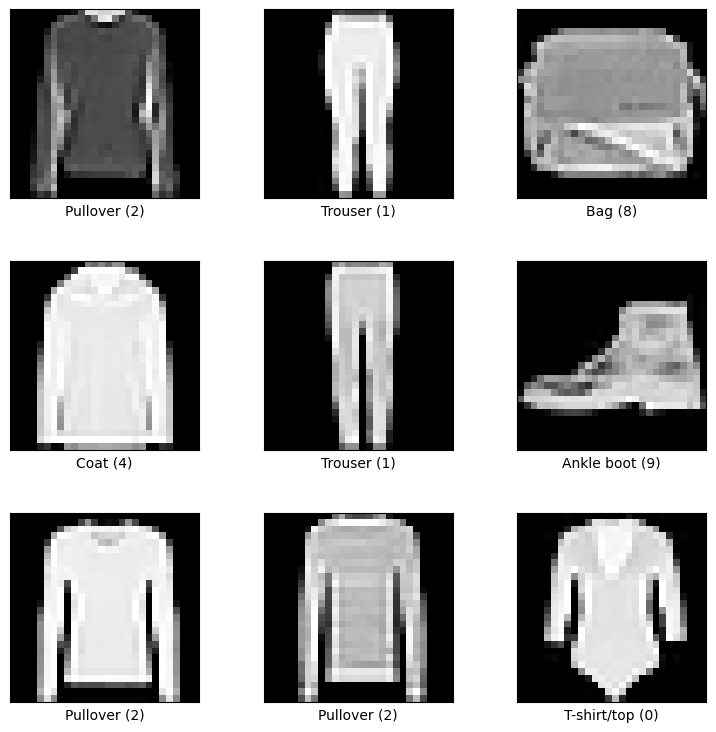

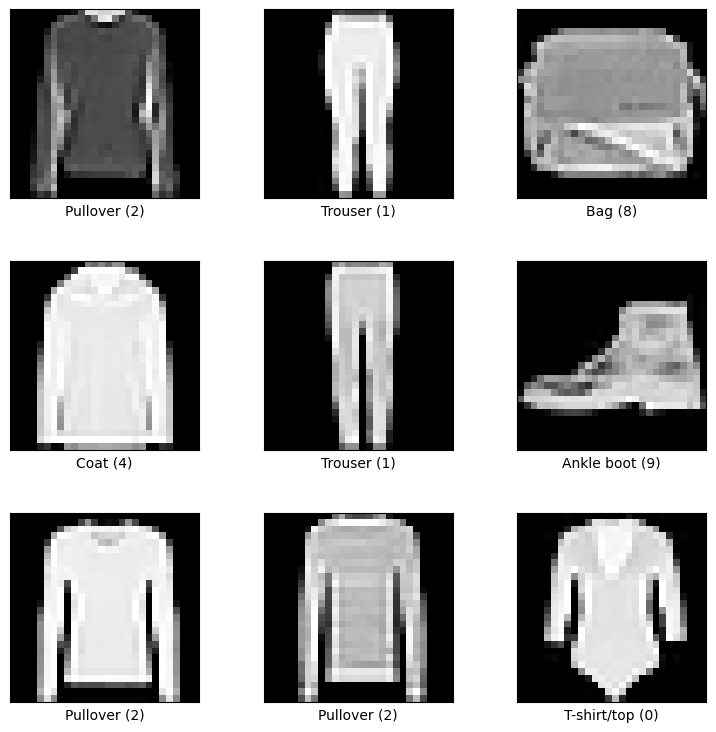

In [3]:
info_train,train = tfds.load(name='fashion_mnist', with_info=True, split='train')
tfds.show_examples(info_train,train)

## Dataset information

In [4]:
def display_dataset_info(info):
    name = info.name
    description = info.description.replace('\n', '<br>') 
    version = info.version
    num_examples = info.splits['train'].num_examples + info.splits['test'].num_examples
    features = info.features
    homepage = info.homepage
    html_content = f"""
    <h2>{name} Dataset Information</h2>
    <p><strong>Description:</strong> {description}</p>
    <p><strong>Version:</strong> {version}</p>
    <p><strong>Total Examples:</strong> {num_examples}</p>
    <p><strong>Homepage:</strong> <a href="{homepage}" target="_blank">{homepage}</a></p>
    <h3>Features:</h3>
    <ul>
    """
    for feature, ftype in features.items():
        html_content += f"<li>{feature}: {ftype}</li>"
    html_content += "</ul>"
    num_classes = info.features['label'].num_classes
    class_names = info.features['label'].names

    html_content += f"<p><strong>Number of Classes:</strong> <span style='color:navy;'>{num_classes}</span></p>"
    html_content += "<p><strong>Class Names:</strong></p><ul>"
    for name in class_names:
        html_content += f"<li style='color:deeppink;'>{name}</li>"
    html_content += "</ul>"
    display(HTML(html_content))
display_dataset_info(info)

##  Split the dataset into training, testing, and validation 

The Fashion MNIST dataset contains a total of 70,000 images.Therefore we split as follows: 
<br> 
- Training set: 56,000 <br>
- Validation set: 7,000<br>
- Test set: 7,000<br>

In [6]:
dataset = datasets.shuffle(70000)  


val_set = dataset.take(7000)  # Take 7000 for validation
test_set = dataset.skip(7000).take(7000)  # Skip 7000, then take 7000 for test
train_set = dataset.skip(14000).take(56000)  # Skip the first 7000 val + 7000 test) to use the rest for training


def process_dataset(dataset):
    try:
        for example in dataset:  
            pass 
    except tf.errors.OutOfRangeError:
        print("Reached the end of the dataset.")

val_size = len(list(val_set))
test_size = len(list(test_set))
train_size = len(list(train_set))

print("Validation set size:", val_size)
print("Test set size:", test_size)
print("Training set size:", train_size)

Validation set size: 7000
Test set size: 7000
Training set size: 56000


## Data Augmentation

In [7]:
def normalization(image, label):
    """Normalize images and apply one-hot encoding to labels."""
    image = tf.cast(image, tf.float32) / 255.0  # Many tenserflow operations expect floating point numbers
    image = tf.image.resize(image, [224, 224])  # Resize the image to 224x224
    label = tf.one_hot(label, depth=10)         # Apply one-hot encoding with 10 classes
    return image, label

This function processes input images and their associated labels to prepare them for training a convolutional neural network (CNN). It performs three main tasks: normalizes image pixel values, resizes images, and applies one-hot encoding to labels.

#### Parameters
- **image** (Tensor): The input image tensor.
- **label** (int): The corresponding label integer for the image.
  
#### Returns
- **Tuple (Tensor, Tensor)**: A tuple containing the normalized and resized image tensor and the one-hot encoded label tensor.

#### Details
- **Normalization**: Converts the image to a `tf.float32` type and scales its pixel values to range between 0 and 1.
- **Resizing**: Adjusts the image dimensions to 224x224 pixels. This size is commonly used for CNN inputs because it is generally large enough to capture important features but small enough to manage computationally.
- **One-Hot Encoding**: Transforms the label into a 10-element tensor using one-hot encoding, representing 10 possible classes.

In [8]:
def augmentation(image, label):
    """Applies data augmentation."""
    # Random flips and rotations
    image = tf.image.random_flip_left_right(image)
    image = tf.image.random_flip_up_down(image)

    # Random zoom
    image = tf.image.random_contrast(image, lower=0.8, upper=1.2)
    image = tf.image.random_brightness(image, max_delta=0.1)  # Random brightness

    return image, label

This function enhances the dataset's variability by applying random data augmentation techniques to the input images. This approach helps improve model generalization by simulating different viewing conditions.

#### Parameters
- **image** (Tensor): Input image tensor that will be augmented.
- **label** (int): Corresponding label for the image, which remains unchanged.

#### Returns
- **Tuple (Tensor, int)**: Returns a tuple of the augmented image tensor and the original label.

#### Augmentation Techniques Used
- **Horizontal and Vertical Flips**: Images are randomly flipped left-right and up-down to simulate different orientations.
- **Contrast Adjustment**: Randomly adjusts the image contrast between 0.8 and 1.2 times the original.
- **Brightness Adjustment**: Randomly changes image brightness by up to ±10% of the current values.

In [9]:
def get_dataset(batch_size=64):
    # Apply both normalization and augmentation to the training dataset
    train_dataset = train_set.map(normalization, num_parallel_calls=tf.data.AUTOTUNE)
    train_dataset = train_dataset.map(augmentation, num_parallel_calls=tf.data.AUTOTUNE)
    train_dataset = train_dataset.shuffle(10000).batch(batch_size).cache().prefetch(tf.data.AUTOTUNE)

    # Apply only normalization to the test and validation datasets
    test_dataset = test_set.map(normalization, num_parallel_calls=tf.data.AUTOTUNE)
    test_dataset = test_dataset.batch(batch_size).cache().prefetch(tf.data.AUTOTUNE)
    
    val_dataset = val_set.map(normalization, num_parallel_calls=tf.data.AUTOTUNE)
    val_dataset = val_dataset.batch(batch_size).cache().prefetch(tf.data.AUTOTUNE)
    
    return train_dataset, test_dataset, val_dataset

The parameter `num_parallel_calls=tf.data.AUTOTUNE` is used within TensorFlow's `tf.data` API to optimize data loading and transformation processes. It instructs TensorFlow to dynamically adjust the number of parallel operations based on available system resources and current workload conditions. This optimization allows for efficient data processing, ensuring maximum utilization of CPU resources without manual tuning, thus improving the throughput and performance of data pipelines during model training and evaluation.


In [10]:
train_dataset, test_dataset, val_dataset = get_dataset()
train_dataset.cache()
val_dataset.cache()

<CacheDataset element_spec=(TensorSpec(shape=(None, 224, 224, 1), dtype=tf.float32, name=None), TensorSpec(shape=(None, 10), dtype=tf.float32, name=None))>

`train_dataset.cache()` and `val_dataset.cache()`  commands store the training and validation datasets in the computer's memory after the first time they are loaded. This is done to speed up the training process because reading data directly from memory is much faster than loading it from disk repeatedly. Caching is useful when the data is used multiple times during model training, like in multiple epochs.

<a id="task2"></a>
## CNN Model Architecture

In [11]:
model = Sequential([
    # First convolutional layer
    Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 1)),
    MaxPooling2D((2, 2)),
    
    # Second convolutional layer
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),

    # Third convolutional layer
    Conv2D(64, (3, 3), activation='relu'),

    # Flatten the output of the conv layers to feed into the dense layer
    Flatten(),

    # Dense layer
    Dense(64, activation='relu'),
    
    # Dropout layer
    Dropout(0.5),
    
    # Output layer
    Dense(10, activation='softmax')
])


The architecture consists of three main parts: convolutional layers, a flattening step, and dense layers for classification.

### Convolutional Layers:
- **First Conv Layer**: 32 filters of size 3x3, with ReLU activation. This is the first feature extraction layer that will receive the input image (224x224 pixels with 1 color channel).
- **First Max Pooling Layer**: Pooling size of 2x2. This layer reduces the spatial dimensions (height and width) by half, which helps in reducing the number of parameters and computation in the network.
  
- **Second Conv Layer**: 64 filters of size 3x3, with ReLU activation. Increasing the number of filters helps the model to learn more complex patterns in the data.
- **Second Max Pooling Layer**: Pooling size of 2x2. Further reduces the spatial dimensions and helps in making the detection of features invariant to scale and orientation changes.

- **Third Conv Layer**: Another layer with 64 filters of size 3x3, activated by ReLU. This layer helps in refining the features extracted by the previous layers for better representation.

### Flattening Step:
- **Flatten Layer**: Converts the 3D output of the last convolutional layer into a 1D feature vector. This is necessary to pass the output to the dense layers for classification.

### Dense Layers:
- **First Dense Layer**: 64 units with ReLU activation. This layer is used to interpret the features extracted by the convolutional and pooling layers.
- **Dropout Layer**: Dropout rate of 0.5. This layer randomly sets the output features of the dense layer to zero during training, which helps in preventing overfitting.

- **Output Layer**: 10 units with softmax activation. This layer outputs the probability distribution over the 10 classes, corresponding to different types of fashion items.

In [12]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 222, 222, 32)   │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 52, 52, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 173056)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │    11,075,648 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,132,042 (42.47 MB)

 Trainable params: 11,132,042 (42.47 MB)

 Non-trainable params: 0 (0.00 B)

<a id="task3"></a>
## Training Process

In [13]:
model.compile(
    optimizer=Adam(), 
    loss=CategoricalCrossentropy(),      
    metrics=['accuracy']              
)

- **Optimizer**: We use 'Adam', which is a method that helps the model learn efficiently. It adjusts how the model updates its knowledge based on the data it sees, helping it learn faster and better.

- **Loss Function**: We choose 'CategoricalCrossentropy' as our loss function. This function measures how well the model's predictions match the actual categories of the images. The goal during training is to minimize this loss, meaning the model's predictions are becoming more accurate.

- **Metrics**: We are tracking 'accuracy' as a metric. Accuracy tells us what percentage of images are correctly classified by the model. It's a straightforward way to see how well the model is performing.

In [14]:
class CollectBatchStats(tf.keras.callbacks.Callback):
    def __init__(self):
        super().__init__() 
        self.batch_losses = []
        self.batch_acc = []

    def on_train_batch_end(self, batch, logs=None):
        self.batch_losses.append(logs['loss'])
        self.batch_acc.append(logs['accuracy'])
        self.model.reset_metrics() 

This Python class defines a custom callback to collect statistics about the training process of a model in TensorFlow. It's useful for monitoring how the model performs on each batch of data during training. When an instance of `CollectBatchStats` is created, it initializes two lists: `self.batch_losses` and `self.batch_acc`. These lists will store the loss and accuracy values for each training batch, respectively.
<br>
`on_train_batch_end`  is called automatically by TensorFlow at the end of each training batch.
  - `logs['loss']` and `logs['accuracy']`are provided by TensorFlow and contain the loss and accuracy metrics for the current batch.
  - The method appends the current batch's loss to `self.batch_losses` and the accuracy to `self.batch_acc`, storing these values for later use.
  - `self.model.reset_metrics()`: This is called to reset the model's metrics after each batch. This ensures that metric reporting is specific to each batch and does not accumulate over multiple batches, which is particularly useful for monitoring and debugging during training.

In [15]:
batch_stats_callback = CollectBatchStats()

history = model.fit(
    train_dataset,
    epochs=3, 
    validation_data=val_dataset,
    callbacks=[batch_stats_callback]
)

Epoch 1/3
875/875 ━━━━━━━━━━━━━━━━━━━━ 520s 593ms/step - accuracy: 0.6988 - loss: 0.8453 - val_accuracy: 0.8394 - val_loss: 0.4530
Epoch 2/3
875/875 ━━━━━━━━━━━━━━━━━━━━ 496s 566ms/step - accuracy: 0.7887 - loss: 0.5793 - val_accuracy: 0.8536 - val_loss: 0.4045
Epoch 3/3
875/875 ━━━━━━━━━━━━━━━━━━━━ 737s 843ms/step - accuracy: 0.8183 - loss: 0.4958 - val_accuracy: 0.8624 - val_loss: 0.3898


Before training, we instantiate `CollectBatchStats`, a custom callback designed to collect and store loss and accuracy metrics at the end of each batch during training.  The model is set to train for 5 epochs. An epoch represents one complete pass through the entire training dataset.
  - **Batch Size**: The dataset is divided into batches of 64 images each.
  - **Training Batches Per Epoch**: With a total of 56,000 training samples, and a batch size of 875, training involves 844 batches per epoch

<a id="task4"></a>
## Results

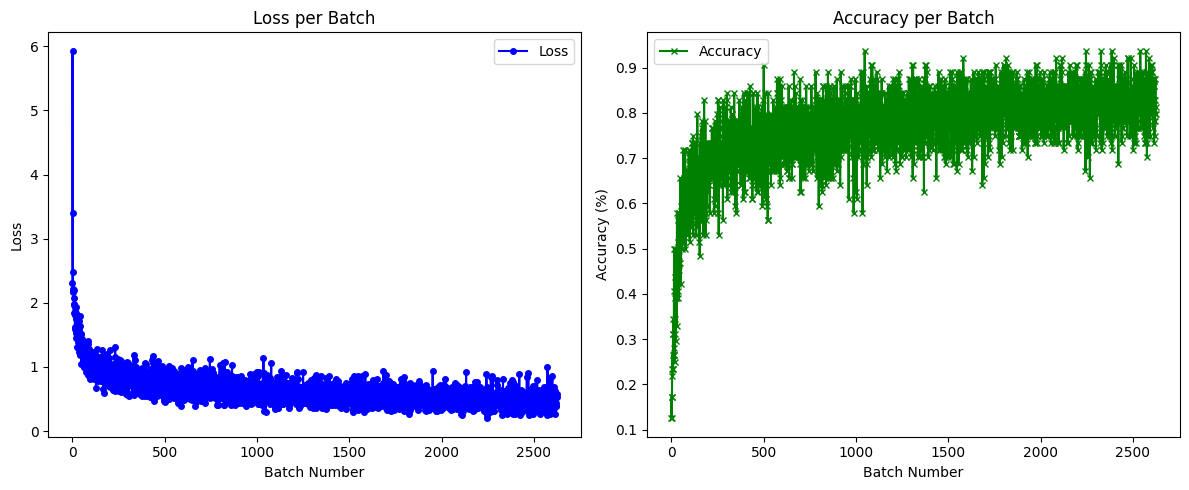

In [19]:
plt.figure(figsize=(12, 5))

# Plot Loss per Batch
plt.subplot(1, 2, 1)
plt.plot(batch_stats_callback.batch_losses, color='blue', linestyle='-', marker='o', markersize=4, label='Loss')
plt.title('Loss per Batch')
plt.xlabel('Batch Number')  
plt.ylabel('Loss')  
plt.legend() 

# Plot Accuracy per Batch
plt.subplot(1, 2, 2)
plt.plot(batch_stats_callback.batch_acc, color='green', linestyle='-', marker='x', markersize=4, label='Accuracy')
plt.title('Accuracy per Batch')
plt.xlabel('Batch Number')
plt.ylabel('Accuracy (%)')
plt.legend()


plt.tight_layout()
plt.show()

### Evaluation

In [20]:
test_loss, test_accuracy = model.evaluate(test_dataset)
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")

110/110 ━━━━━━━━━━━━━━━━━━━━ 18s 163ms/step - accuracy: 0.8594 - loss: 0.3858
Test Loss: 0.3848257064819336
Test Accuracy: 0.8577142953872681


After training and testing the model, the final metrics for the test set are as follows:

- **Test Loss**: The model achieved a test loss of `0.38`, which indicates the average loss per sample across all testing examples. A lower loss value signifies better performance, suggesting that the model's predictions were relatively close to the actual labels.

- **Test Accuracy**: The model reached an accuracy of `85%` on the test data. This metric shows how often the model correctly predicted the label out of all the test samples. 
- With a total of 7000 testing samples, and a batch size of 64, testing involves 110 batches

### Prediction results

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step


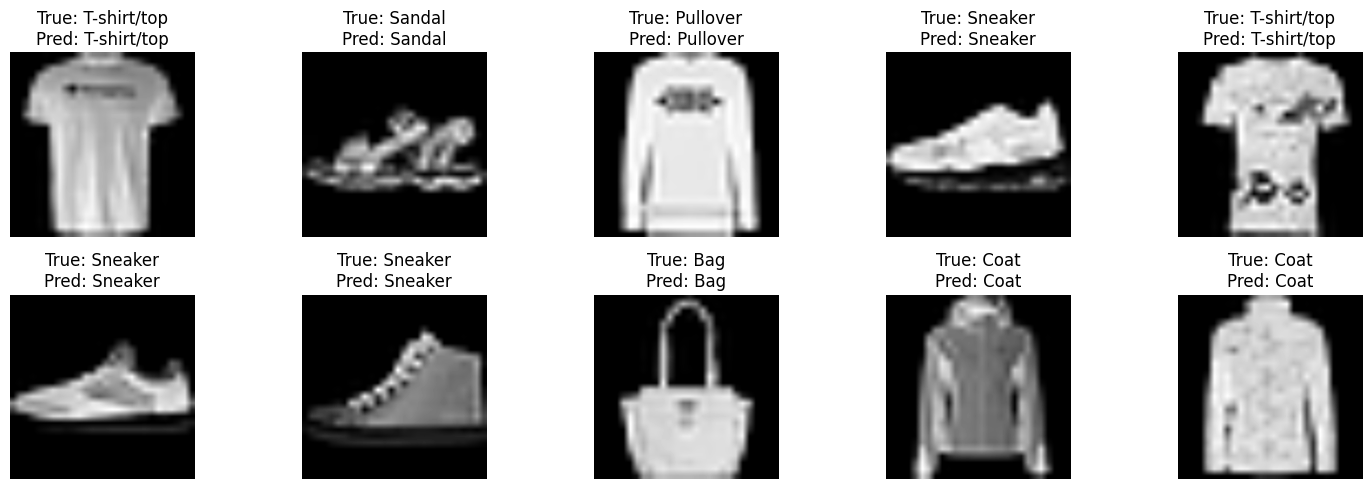

In [21]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']


def prepare_data(test_dataset, model, num_samples=10):
    for images, labels in test_dataset.take(1):
        predictions = model.predict(images)
        predicted_classes = np.argmax(predictions, axis=1)
        true_classes = np.argmax(labels.numpy(), axis=1)
        return images[:num_samples], true_classes[:num_samples], predicted_classes[:num_samples]


def plot_images(images, true_labels, predicted_labels):
    plt.figure(figsize=(15, 5))
    for i in range(len(images)):
        plt.subplot(2, 5, i + 1)
        plt.imshow(images[i], cmap='gray') 
        plt.title(f"True: {class_names[true_labels[i]]}\nPred: {class_names[predicted_labels[i]]}")
        plt.axis('off')
    plt.tight_layout()
    plt.show()


images, true_labels, predicted_labels = prepare_data(test_dataset, model, num_samples=10)
images = images.numpy() * 255
images = images.astype('uint8')  

plot_images(images, true_labels, predicted_labels)

### Calculating metrics

In [22]:
y_true = []
y_pred = []
for images, labels in test_dataset:
    predictions = model.predict(images)
    y_true.extend(np.argmax(labels.numpy(), axis=1))
    y_pred.extend(np.argmax(predictions, axis=1))
    
y_true = np.array(y_true)
y_pred = np.array(y_pred)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step
2/2 ━━━━━━━━

2024-10-12 10:47:58.050786: I tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


### Confusion matrix

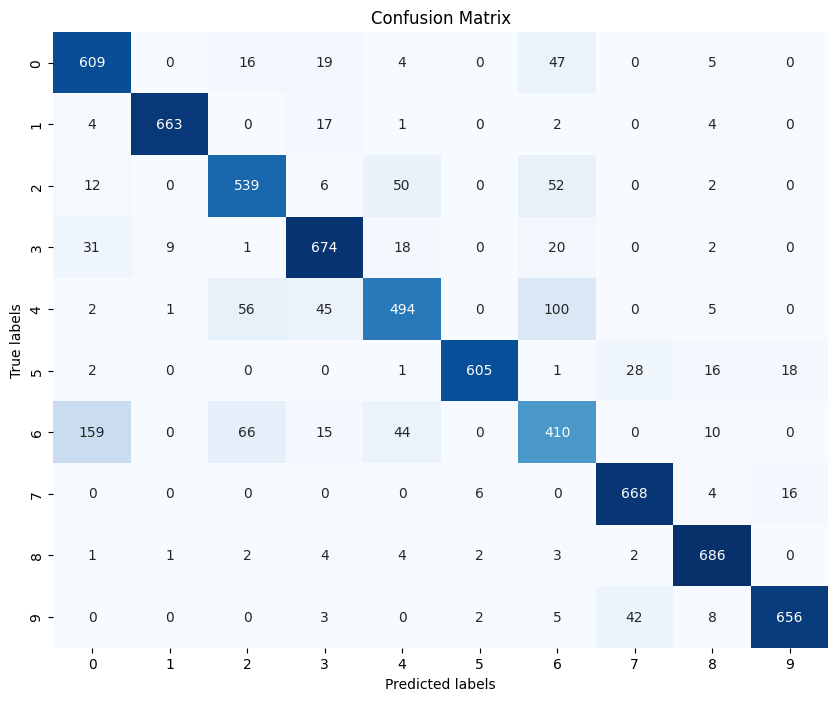

In [25]:
confusion_mtx = tf.math.confusion_matrix(labels=y_true, predictions=y_pred, num_classes=10)
confusion_array = confusion_mtx.numpy()

plt.figure(figsize=(10, 8))
sns.heatmap(confusion_array, annot=True, fmt='g', cmap='Blues', cbar=False)  
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()


### Accuracy, Precision, Recall & F1

In [31]:
precision, recall, f1, _ = precision_recall_fscore_support(y_true, y_pred, average='weighted')
accuracy_percent = accuracy_score(y_true, y_pred) * 100
precision_percent = precision * 100
recall_percent = recall * 100
f1_percent = f1 * 100

metrics_df = pd.DataFrame({
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1-Score'],
    'Model 1': [accuracy_percent, precision_percent, recall_percent, f1_percent]
})


print(metrics_df)

      Metric    Model 1
0   Accuracy  85.771429
1  Precision  85.818343
2     Recall  85.771429
3   F1-Score  85.655504


## Saving the model

In [32]:
model.save('my_fashion_model.h5')

<a id="task5"></a>
## Tuning

In [33]:
optimizer = Adam(learning_rate=0.001) 
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

In [34]:
batch_stats_callback = CollectBatchStats()

history = model.fit(
    train_dataset,
    epochs=1, 
    validation_data=val_dataset,
    callbacks=[batch_stats_callback]
)

875/875 ━━━━━━━━━━━━━━━━━━━━ 544s 621ms/step - accuracy: 0.8358 - loss: 0.4474 - val_accuracy: 0.8751 - val_loss: 0.3551


In [35]:
evaluation = model.evaluate(test_dataset)
print("Test Loss:", evaluation[0])
print("Test Accuracy:", evaluation[1])

110/110 ━━━━━━━━━━━━━━━━━━━━ 17s 155ms/step - accuracy: 0.8720 - loss: 0.3496
Test Loss: 0.349837064743042
Test Accuracy: 0.8725714087486267


After giving the model a really small learning rate during the fine-tuning phase, the model's performance showed slight improvements:
- **Loss**: The loss decreased from `0.38` to `0.34`. This reduction indicates that the model is performing slightly better in terms of minimizing the error between predicted outputs and true values.
- **Accuracy**: There was a 2% increase in accuracy, from `85%` to `87%`.
  
While the improvements are promising, the changes are relatively minor. This outcome suggests that while the tweak to the learning rate has had a positive effect, further adjustments and experimentation may be necessary to achieve significant enhancements in model performance. Therefore, we decided to tune `new_model` this time with `batch_normalization` to see if there is any difference at all.

## New_ model

In [41]:
new_model = Sequential([
    # First convolutional layer
    Conv2D(32, (3, 3), input_shape=(224, 224, 1), use_bias=False), 
    BatchNormalization(),
    Activation('relu'), 
    MaxPooling2D((2, 2)),
    
    # Second convolutional layer
    Conv2D(64, (3, 3), use_bias=False), 
    BatchNormalization(),
    Activation('relu'), 
    MaxPooling2D((2, 2)),
    
    # Third convolutional layer
    Conv2D(64, (3, 3), use_bias=False),  
    BatchNormalization(),
    Activation('relu'), 
    
    # Flatten the output of the conv layers to feed into the dense layer
    Flatten(),
    
    # Dense layer
    Dense(64, use_bias=False), 
    BatchNormalization(),
    Activation('relu'),  
    
    # Dropout layer
    Dropout(0.5),
    
    # Output layer
    Dense(10, activation='softmax')
])

This `new_model` architecture is optimized for generalization and efficiency, using batch normalization and again dropout techniques to enhance performance.

- **Convolutional Layers**: 
  - **First Layer**: 
    - **Filter**: 32, **Kernel Size**: 3x3, **Input Shape**: 224x224 pixels, grayscale. 
    - **Batch Normalization** followed by **ReLU Activation** and **Max Pooling** (2x2).
  - **Second Layer**:
    - **Filter**: 64, **Kernel Size**: 3x3.
    - Again, followed by **Batch Normalization**, **ReLU Activation**, and **Max Pooling** (2x2).
  - **Third Layer**:
    - **Filter**: 64, **Kernel Size**: 3x3.
    - Follows the same pattern with **Batch Normalization** and **ReLU Activation** but no pooling to preserve more spatial features.

- **Flattening Layer**:
  - Converts the 3D output of the last convolutional layer into a 1D vector, preparing it for the dense layers.

- **Dense Layers**:
  - **First Dense Layer**:
    - **Units**: 64, without bias, as it is redundant due to the preceding **Batch Normalization**.
    - Followed by **Batch Normalization** and **ReLU Activation** for enhanced learning dynamics.
  - **Dropout**:
    - **Rate**: 50%. Helps in reducing overfitting by randomly setting neuron outputs to zero during training.
  
- **Output Layer**:
  - **Units**: 10 (corresponding to the number of classes).
  - **Activation**: Softmax. Used for multi-class probability distribution over the predicted classes.

In [42]:
optimizer = SGD(learning_rate=0.01, momentum=0.9)
new_model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

For this training iteration, we chose to use the Stochastic Gradient Descent (SGD) optimizer instead of Adam. The learning rate was set at 0.01 and momentum at 0.9. The model was trained for a total of 2 epochs.

The choice of SGD and a shorter training period is part of an experimental approach designed to compare different optimization strategies and their impact on the initial learning phase of the model.

### Training new_model

In [43]:
batch_stats_callback_new = CollectBatchStats()

history_new = new_model.fit(
    train_dataset,
    epochs=2, 
    validation_data=val_dataset,
    callbacks=[batch_stats_callback]
)

Epoch 1/2
875/875 ━━━━━━━━━━━━━━━━━━━━ 993s 1s/step - accuracy: 0.7485 - loss: 0.7274 - val_accuracy: 0.8376 - val_loss: 0.4744
Epoch 2/2
875/875 ━━━━━━━━━━━━━━━━━━━━ 826s 944ms/step - accuracy: 0.8146 - loss: 0.5319 - val_accuracy: 0.8077 - val_loss: 0.5075


### Evaluating new_model

In [44]:
test_loss, test_accuracy = new_model.evaluate(test_dataset)
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")

110/110 ━━━━━━━━━━━━━━━━━━━━ 16s 145ms/step - accuracy: 0.8136 - loss: 0.4898
Test Loss: 0.4906306862831116
Test Accuracy: 0.8125714063644409


As we can see, the new model's accuracy dropped and its loss increased

### Predictions

In [46]:
y_pred_new = new_model.predict(test_dataset)
y_pred_new = np.argmax(y_pred_new, axis=1)  
accuracy_new = accuracy_score(y_true, y_pred_new) * 100
precision_new, recall_new, f1_new, _ = precision_recall_fscore_support(y_true, y_pred_new, average='weighted')
precision_new *= 100
recall_new *= 100
f1_new *= 100
metrics_df['Model 2'] = [accuracy_new, precision_new, recall_new, f1_new]

110/110 ━━━━━━━━━━━━━━━━━━━━ 16s 145ms/step


## Conclusions

In [49]:
display(HTML(metrics_df.to_html()))

,Metric,Model 1,Model 2
0,Accuracy,85.771429,81.257143
1,Precision,85.818343,82.840900
2,Recall,85.771429,81.257143
3,F1-Score,85.655504,81.276643


When comparing the performance of two different optimization strategies, Adam and SGD, for training our neural network model, the results indicate that the Adam optimizer leads to superior performance across all key metrics, including Accuracy, Precision, Recall, and F1-Score. The model trained with Adam achieved  higher scores, suggesting that Adam is more effective for this particular task.

### Recommendations for Future Work

- **Explore Adam Variants**: Investigate other optimizers that build on the principles of Adam, such as AdamW or Nadam. These variants may offer further improvements in model training efficiency and effectiveness.

- **Adjust Learning Rates**: As observed previously, providing a smaller learning rate improved model accuracy. Therefore, experimenting with different learning rates or adaptive learning rate methods when using Adam can be beneficial.

- **Increase Training Data**: More data can enhance the model's ability to generalize better across new, unseen datasets.

- **Increase Number of Epochs**: Although it is computationally expensive and time-consuming, increasing the number of epochs can be helpful for achieving better model performance.

# Submitted by Anahit Petrosian